<h1> Questions I wanted to ask: </h1>
    <body> 
    1. What is the average cost of all cars?<br>
    2. What is the average cost of every car make?<br>
    3. What car model has the best 0-60?<br>
    4. What car make has the best horse power in comparison to price?<br>
    5. How does the average horsepower vary by car make? <br>
    6. Is there a correlation between engine size and torque?<br>
    7. Which car make and model combination has the highest horsepower? <br>
    8. Is there a relationship between engine size and the 0-60 MPH time? <br>
    9. Can we identify any outliers in terms of price within specific car makes? <br>
    </body>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("Sport car price.csv")
df.dropna(subset=['0-60 MPH Time (seconds)', 'Price (in USD)'], inplace=True)

In [4]:
df['Price (in USD)'] = df['Price (in USD)'].str.replace(',', '')
df['Price (in USD)'] = pd.to_numeric(df['Price (in USD)'], errors='coerce')

<h1> The following is the average cost of all cars. </h1>

In [5]:
average_price = df['Price (in USD)'].mean()
average_price

382035.9414101291

<h1> The cost of all cars. </h1>

In [6]:
groups = df.groupby('Car Make')['Price (in USD)']
all_cars = groups.mean().sort_values()
all_cars



Car Make
Mazda            2.683000e+04
Subaru           3.817000e+04
Toyota           4.307200e+04
Nissan           5.075216e+04
Kia              5.220000e+04
Chevrolet        5.524692e+04
Dodge            7.097683e+04
Alpine           7.150000e+04
Alfa Romeo       7.413406e+04
Ariel            7.500000e+04
BMW              8.013413e+04
Jaguar           8.311833e+04
Lexus            9.322885e+04
Audi             9.387493e+04
Porsche          1.294784e+05
TVR              1.405000e+05
Maserati         1.476562e+05
Polestar         1.550000e+05
Acura            1.578741e+05
Tesla            1.625274e+05
Mercedes-Benz    1.646614e+05
Mercedes-AMG     1.693636e+05
Aston Martin     2.150791e+05
Bentley          2.156290e+05
Ultima           2.200000e+05
McLaren          2.978079e+05
Rolls-Royce      3.332350e+05
Ford             3.688295e+05
Ferrari          4.100991e+05
Lamborghini      4.259472e+05
Lotus            5.084359e+05
Shelby           1.000000e+06
W Motors         2.216667e+06
R

Text(0, 0.5, 'Prices')

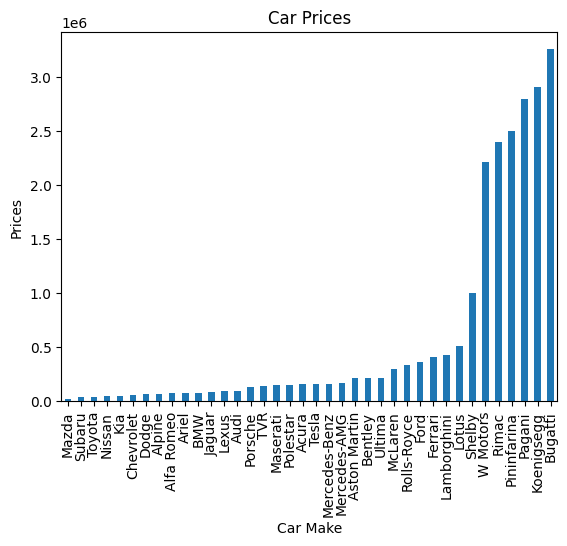

In [7]:
all_cars.plot(kind='bar')
plt.title("Car Prices")
plt.xlabel("Car Make")
plt.ylabel("Prices")

<h1> Getting the best 0-60 car </h1>

In [8]:
sorted = df.sort_values(by=['0-60 MPH Time (seconds)'])
sorted

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
439,Rimac,C_Two,2021,Electric,1914,1732,1.8,2400000
387,Rimac,C_Two,2022,NaN,1888,1696,1.8,2400000
1006,Rimac,Nevera,2021,Electric Motor,1888,1696,1.85,2400000
824,Rimac,Nevera,2021,Electric,1914,1696,1.85,2400000
986,Rimac,Nevera,2022,Electric,1914,1696,1.85,2400000
...,...,...,...,...,...,...,...,...
820,Jaguar,F-Type,2022,2,296,295,5.4,62500
13,Jaguar,F-Type,2022,3,296,295,5.4,70100
707,Dodge,Challenger,2022,3.6,305,268,6.4,28000
92,Mazda,MX-5 Miata,2021,2,181,151,6.5,26830


In [9]:
bestTime = sorted.iloc[0]
bestTime

Car Make                      Rimac
Car Model                     C_Two
Year                           2021
Engine Size (L)            Electric
Horsepower                     1914
Torque (lb-ft)                 1732
0-60 MPH Time (seconds)         1.8
Price (in USD)              2400000
Name: 439, dtype: object

<h1>What car make has the best horse power in comparison to price?</h1>

In [11]:
df['Horsepower'] = pd.to_numeric(df['Horsepower'], errors='coerce')
df.dropna(subset=['Horsepower', 'Price (in USD)'], inplace=True)


<Axes: xlabel='Car Make'>

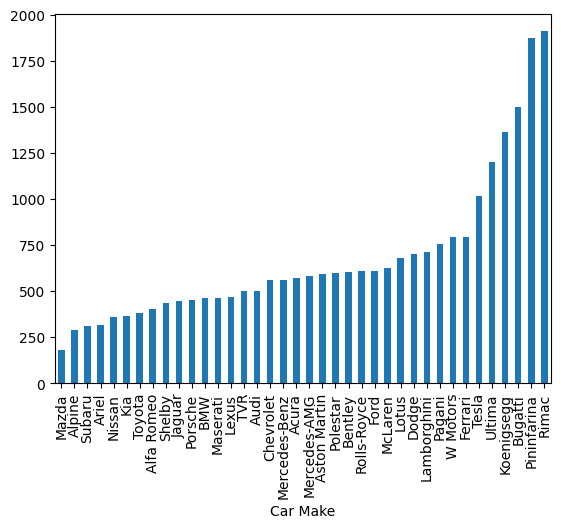

In [33]:
groups = df.groupby('Car Make')['Horsepower']
horsepower = groups.mean().sort_values()
horsepower.plot(kind='bar')

In [34]:
horsepower.median()

578.7727272727273

In [26]:
price_weight = .9
horsepower_weight = .1
df['Weighted Score'] = (price_weight * df['Price (in USD)']) + (horsepower_weight * df['Horsepower'])

In [27]:
best_car = df.loc[df['Weighted Score'].idxmin()]
best_car

Car Make                   Chevrolet
Car Model                     Camaro
Year                            2021
Engine Size (L)                  6.2
Horsepower                     455.0
Torque (lb-ft)                   455
0-60 MPH Time (seconds)            4
Price (in USD)                 25000
Weighted Score               22545.5
Name: 597, dtype: object

<h1>How does the average horsepower vary by car make?</h1>